<h1>Импорт библиотек

# Подготовка doctest
<p>Буду использовать для тестирования</p>

In [1]:
import doctest
from IPython.core.magic import register_cell_magic

# Магия ячейки для запуска doctest
@register_cell_magic
def doctest_magic(line, cell):
    # Инициализируем код из ячейки
    exec(cell, globals())

    # Ищем все локальные объекты
    local_vars = {}
    exec(cell, globals(), local_vars)

    # Проходим по всем объектам в локальных переменных и ищем docstring'и для тестирования
    for name, obj in local_vars.items():
        if callable(obj):  # Проверяем, объект является функцией или классом
            print(f"Running doctests for {name}...\n")
            try:
                doctest.run_docstring_examples(obj, globals(), name=name, verbose=True)
            except Exception as e:
                print(f"Error running doctests for {name}: {e}")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [70]:
%%doctest_magic
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    >>> sum_prod([np.array([[0, 0, 1], [0, 1, 0], [1, 0, 2]]), np.array([[2, 0, 1], [2, 1, 4], [2, 0, 4]])], [np.array([[6], [3], [2]]), np.array([[4], [1], [1]])])
    [[11]
     [16]
     [22]]
    '''
    count = len(V)
    result = np.nan
    for i in range(count):
        matrix = np.dot(X[i], V[i])
        if result is np.nan:
            result = matrix
        else:
            result = np.add(result, matrix)
    print(result)


Running doctests for sum_prod...

Finding tests in sum_prod
Trying:
    sum_prod([np.array([[0, 0, 1], [0, 1, 0], [1, 0, 2]]), np.array([[2, 0, 1], [2, 1, 4], [2, 0, 4]])], [np.array([[6], [3], [2]]), np.array([[4], [1], [1]])])
Expecting:
    [[11]
     [16]
     [22]]
ok


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [67]:
%%doctest_magic
def binarize(M, threshold=0.5):
    """
    >>> binarize(np.array([[1, 0, 2], [0, 1, 0], [1, 1, 0]]), threshold=0.5)
    [[1 0 1]
     [0 1 0]
     [1 1 0]]
    """
    result = M.copy()
    for i in range(len(M)):
        for j in range(len(M[0])):
            result[i][j] = 1 if M[i][j] > threshold else 0
    print(result)

Running doctests for binarize...

Finding tests in binarize
Trying:
    binarize(np.array([[1, 0, 2], [0, 1, 0], [1, 1, 0]]), threshold=0.5)
Expecting:
    [[1 0 1]
     [0 1 0]
     [1 1 0]]
ok


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [66]:
%%doctest_magic
def unique_rows(mat):
    """
    >>> unique_rows(np.array([[2, 3, 0], [0, 1, 1], [2, 1, 2]]))
    [0 2 3]
    [0 1]
    [1 2]
    """
    n = len(mat)
    for i in range(n):
        print(np.unique(mat[i]))


def unique_columns(mat):
    """
    >>> unique_columns(np.array([[2, 3, 0], [0, 1, 1], [2, 1, 2]]))
    [0 2]
    [1 3]
    [0 1 2]
    """
    countRaws = len(mat)
    countCols = len(mat[0])
    for i in range(countRaws):
        print(np.unique([mat[j][i] for j in range(countCols)]))

Running doctests for unique_rows...

Finding tests in unique_rows
Trying:
    unique_rows(np.array([[2, 3, 0], [0, 1, 1], [2, 1, 2]]))
Expecting:
    [0 2 3]
    [0 1]
    [1 2]
ok
Running doctests for unique_columns...

Finding tests in unique_columns
Trying:
    unique_columns(np.array([[2, 3, 0], [0, 1, 1], [2, 1, 2]]))
Expecting:
    [0 2]
    [1 3]
    [0 1 2]
ok


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [44]:
def normal_distribution_func(m, n):
    mat = np.random.normal(150, 10, (m, n))
    
    for i in range(m):
        _, ax = plt.subplots()
        mean = mat[i].mean()
        var = mat[i].var()
        print(f'мат. ожидание - {mean}, срока номер {i + 1}')
        print(f'дисперсия - {var}, срока номер {i + 1}')
        ax.hist(mat[i])
        ax.set_title(f'строка номер {i + 1}')

    for j in range(n):
        _, ax = plt.subplots()
        columns = np.array([mat[j][i] for j in range(m)])
        mean = columns.mean()
        var = columns.var()
        print(f'мат. ожидание - {mean}, колонка номер {i + 1}')
        print(f'дисперсия - {var}, колонка номер {i + 1}')
        ax.hist(columns)
        ax.set_title(f'колонка номер {i + 1}')

мат. ожидание - 154.74648758660533, срока номер 1
дисперсия - 30.875742631663925, срока номер 1
мат. ожидание - 145.9883720132964, срока номер 2
дисперсия - 30.74804392920411, срока номер 2
мат. ожидание - 144.8165866024941, колонка номер 2
дисперсия - 19.12580945109809, колонка номер 2
мат. ожидание - 144.8165866024941, колонка номер 2
дисперсия - 19.12580945109809, колонка номер 2


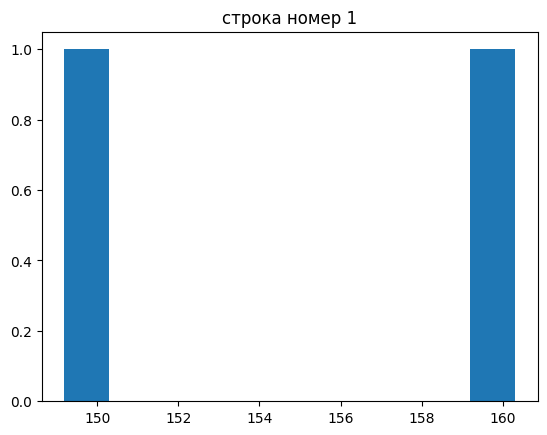

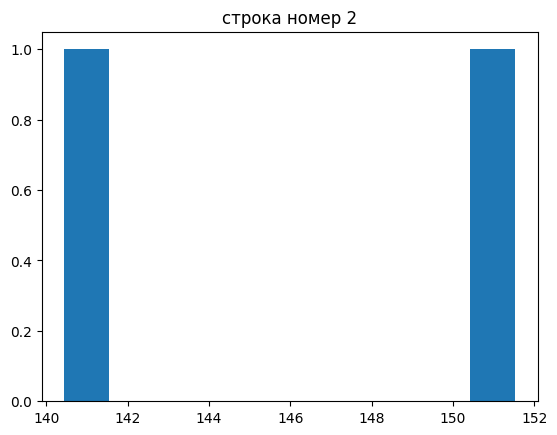

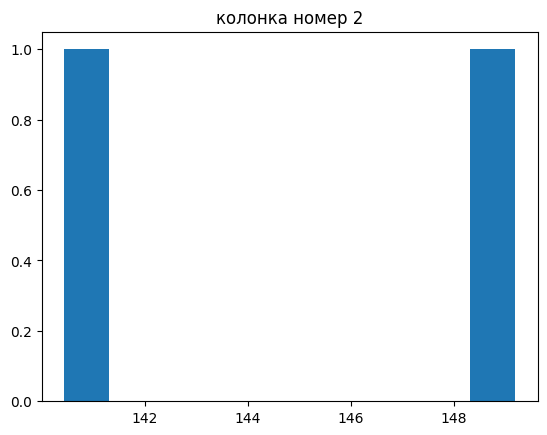

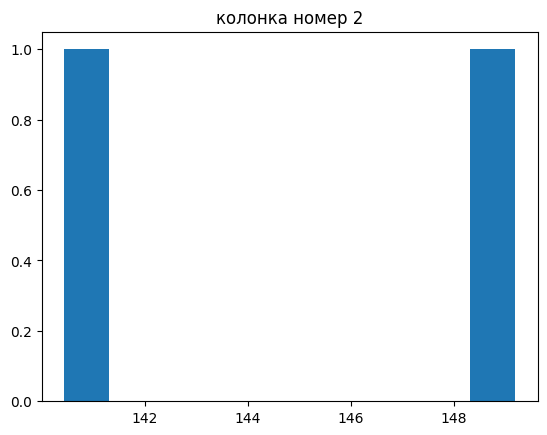

In [42]:
normal_distribution_func(2, 2)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [68]:
%%doctest_magic
def chess(m, n, a, b):
    """
    >>> chess(3, 3, 2, 1)
    [[2. 1. 2.]
     [1. 2. 1.]
     [2. 1. 2.]]
    """
    mat = np.eye(m, n)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i][j] = a
            else:
                mat[i][j] = b
    print(mat)

Running doctests for chess...

Finding tests in chess
Trying:
    chess(3, 3, 2, 1)
Expecting:
    [[2. 1. 2.]
     [1. 2. 1.]
     [2. 1. 2.]]
ok


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [52]:
from matplotlib.patches import Ellipse

In [59]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    plt.figure(figsize = (m,n))
    rectangle = plt.Rectangle(xy = 0, width = a / m, height = b / n, color = rectangle_color)
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_patch(rectangle)
    ax.set_facecolor(background_color)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    plt.figure(figsize = (m,n))
    ellipse = Ellipse((0.5, 0.5), width = a / m, height = b / n, color = ellipse_color)
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_patch(ellipse)
    ax.set_facecolor(background_color)
    plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [69]:
def magic(time_series, p):
    mean = time_series.mean()
    var = time_series.var()
    deviation = time_series.std()
    print(f'мат. ожидание - {mean}')
    print(f'дисперсия - {var}')
    print(f'стандартное отклонение - {deviation}')

    min = []
    max = []
    l = len(time_series)
    flag = time_series[0] - time_series[1] > 0
    for i in range(l - 1):
        if flag != time_series[i] - time_series[i + 1] > 0:
            if time_series[i] - time_series[i + 1] == 0:
                continue
            else:
                max.append(time_series[i]) if flag else min.append(time_series[i])
                flag = time_series[i] - time_series[i + 1] > 0
    print(f'локальный максимум {max}')
    print(f'локальный минимум {min}')
    print(f'новый ряд - {[sum(time_series[i:i+p:1])/p for i in range(l-p)]}')

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [57]:
def one_hot_encoding(vector):
    num = np.max(vector) + 1
    one_hot_matrix = np.zeros((len(vector), num), dtype=int)

    for i, v in enumerate(vector):
        one_hot_matrix[i, v] = 1

    print(one_hot_matrix)